In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Exercise 1

Load read count dataset (featurecounts.tsv).

In [38]:
featurecounts = pd.read_csv("/project/shared/python/2_python_data_science/data/featurecounts.tsv", sep="\t",skiprows=[0])
featurecounts

,Geneid,Chr,Start,End,Strand,Length,bam/RS411-nasc-1.bam,bam/RS411-nasc-2.bam,bam/RS411-nasc-3.bam,bam/SEM-nasc-1.bam,bam/SEM-nasc-2.bam,bam/SEM-nasc-3.bam
0,DDX11L1,chr1;chr1;chr1,11874;12613;13221,12227;12721;14409,+;+;+,1652,9,6,8,8,8,6
1,WASH7P,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,14362;14970;15796;16607;16858;17233;17606;1791...,14829;15038;15947;16765;17055;17368;17742;1806...,-;-;-;-;-;-;-;-;-;-;-,1769,132,86,105,93,102,135
2,FAM138A,chr1;chr1;chr1;chr19;chr19;chr19,34611;35277;35721;76220;76886;77330,35174;35481;36081;76783;77090;77690,-;-;-;-;-;-,2260,0,0,0,0,0,0
3,FAM138F,chr1;chr1;chr1;chr19;chr19;chr19,34611;35277;35721;76220;76886;77330,35174;35481;36081;76783;77090;77690,-;-;-;-;-;-,2260,0,0,0,0,0,0
4,OR4F5,chr1,69091,70008,+,918,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23705,CDY1B,chrY;chrY;chrY;chrY;chrY;chrY,26191377;26191940;26192244;27768264;27768264;2...,26191823;26194161;26194161;27770181;27770485;2...,-;-;-;+;+;+,5338,0,0,0,0,0,0
23706,CDY1,chrY;chrY;chrY;chrY;chrY;chrY,26191377;26191940;26192244;27768264;27768264;2...,26191823;26194161;26194161;27770181;27770485;2...,-;-;-;+;+;+,5338,0,0,0,0,0,0
23707,CSPG4P1Y,chrY;chrY;chrY;chrY,26329581;26332656;27629055;27632781,26329652;26333378;27629777;27632852,-;-;+;+,1590,0,0,0,0,0,0
23708,GOLGA2P3Y,chrY;chrY;chrY;chrY;chrY;chrY;chrY;chrY;chrY;c...,26356114;26356280;26356462;26356906;26357415;2...,26356197;26356372;26356650;26356994;26357489;2...,-;-;-;-;-;-;-;-;-;+;+;+;+;+;+;+;+;+,2124,0,0,0,0,0,0


Remove unwanted columns (Chr, Start, End, Strand, Length) and rename the remaining columns.

In [39]:
featurecounts=featurecounts.drop(columns = ["Chr","Start","End","Strand","Length"])
featurecounts.columns=featurecounts.columns.str.replace("bam/","").str.replace(".bam","")
featurecounts

,Geneid,RS411-nasc-1,RS411-nasc-2,RS411-nasc-3,SEM-nasc-1,SEM-nasc-2,SEM-nasc-3
0,DDX11L1,9,6,8,8,8,6
1,WASH7P,132,86,105,93,102,135
2,FAM138A,0,0,0,0,0,0
3,FAM138F,0,0,0,0,0,0
4,OR4F5,0,0,0,0,0,0
...,...,...,...,...,...,...,...
23705,CDY1B,0,0,0,0,0,0
23706,CDY1,0,0,0,0,0,0
23707,CSPG4P1Y,0,0,0,0,0,0
23708,GOLGA2P3Y,0,0,0,0,0,0


Filter out genes with 0 counts across all samples.

In [40]:
featurecounts_filtered = featurecounts[featurecounts.iloc[:, 1:6].sum(axis=1) > 0]
featurecounts_filtered

,Geneid,RS411-nasc-1,RS411-nasc-2,RS411-nasc-3,SEM-nasc-1,SEM-nasc-2,SEM-nasc-3
0,DDX11L1,9,6,8,8,8,6
1,WASH7P,132,86,105,93,102,135
5,LOC729737,1,2,3,0,1,2
8,LOC100133331,86,72,73,69,26,62
12,LOC100288069,58,46,52,36,55,32
...,...,...,...,...,...,...,...
23606,VAMP7,3,0,1,3,1,0
23607,IL9R,4,1,1,8,2,1
23629,PRKY,4,3,4,1,1,1
23649,UTY,0,0,0,1,0,0


Plot scatter plot of pairs of replicates.

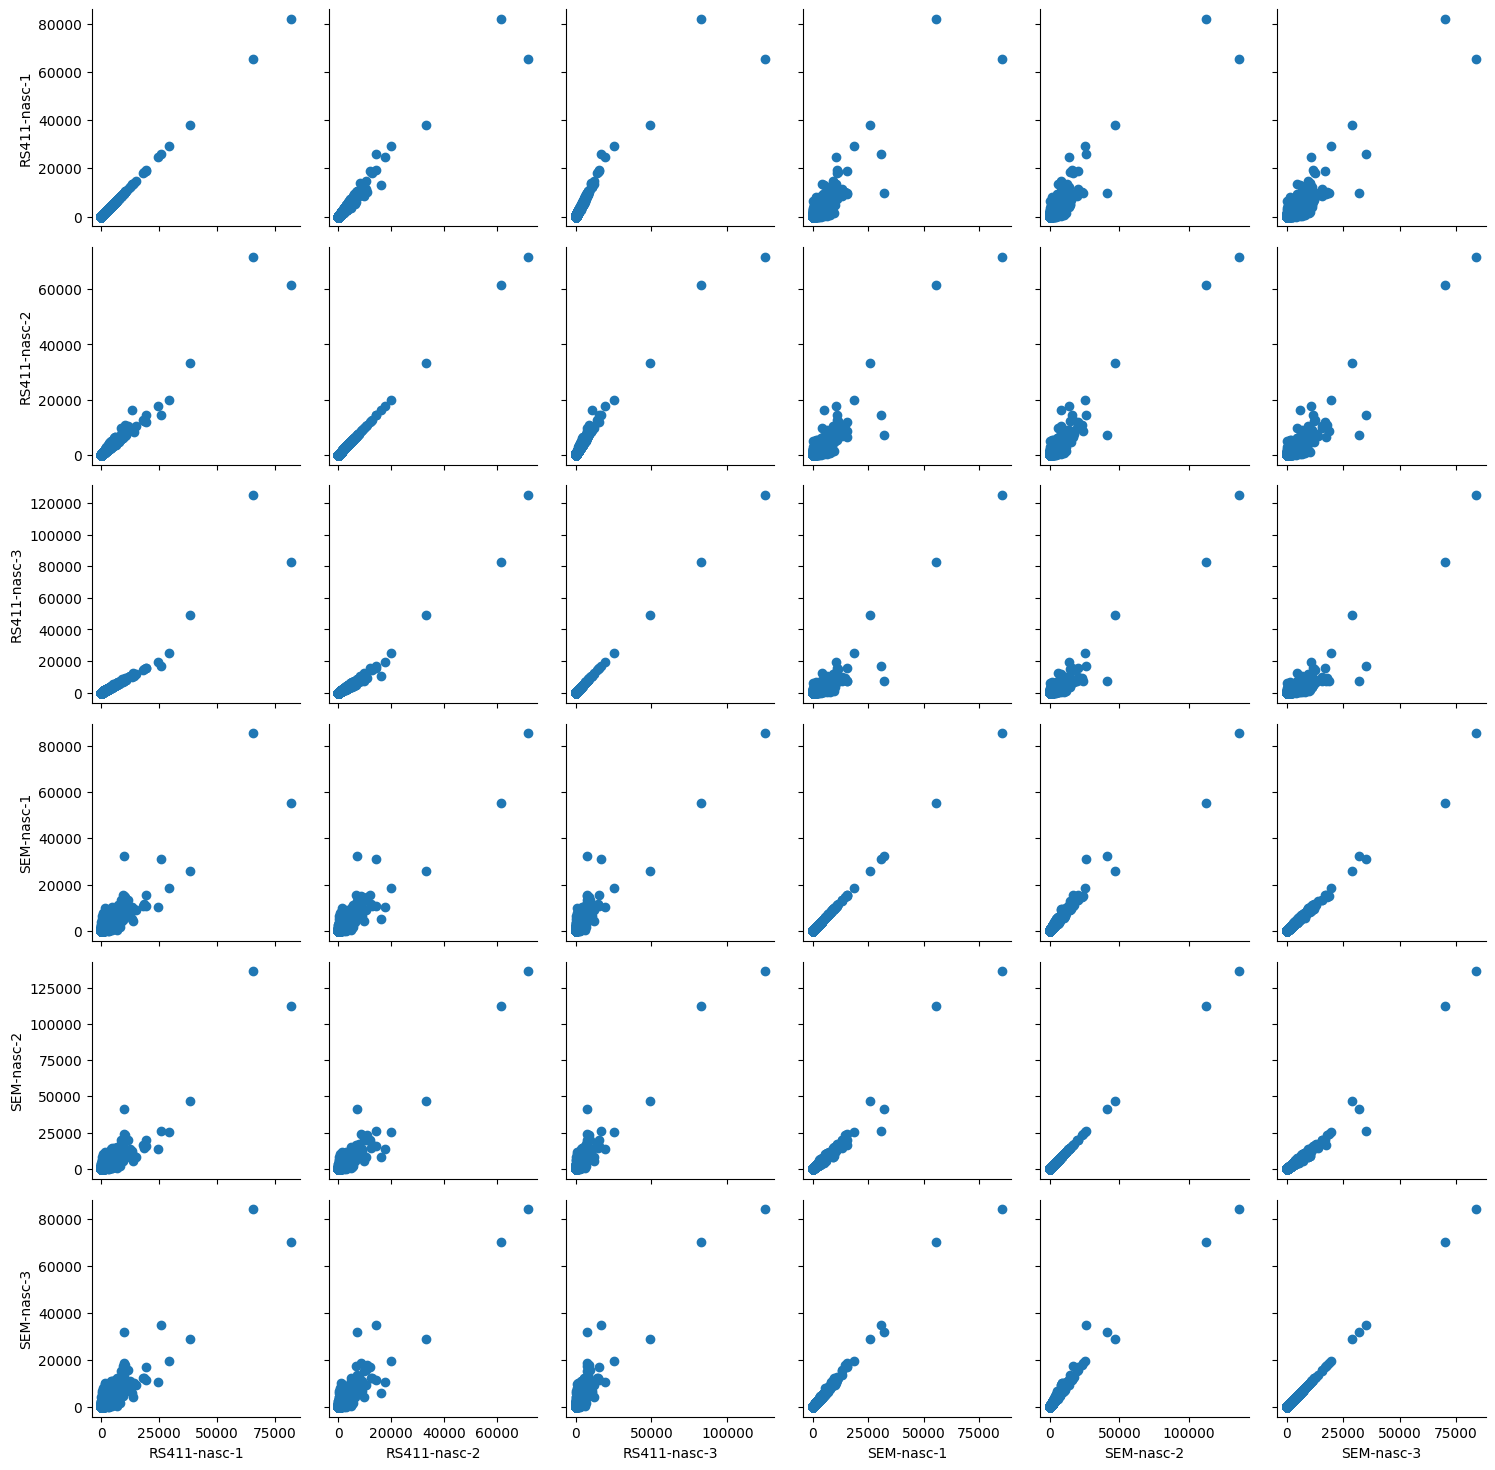

In [41]:
plot=sns.PairGrid(featurecounts_filtered)
plot.map(plt.scatter)

Reshape the data in tidy format.

In [42]:
df = featurecounts_filtered.melt(
    id_vars=["Geneid"],
    var_name="samples",
    value_name="count")
df

,Geneid,samples,count
0,DDX11L1,RS411-nasc-1,9
1,WASH7P,RS411-nasc-1,132
2,LOC729737,RS411-nasc-1,1
3,LOC100133331,RS411-nasc-1,86
4,LOC100288069,RS411-nasc-1,58
...,...,...,...
114685,VAMP7,SEM-nasc-3,0
114686,IL9R,SEM-nasc-3,1
114687,PRKY,SEM-nasc-3,1
114688,UTY,SEM-nasc-3,0


Plot a histogram of read counts across all samples, on a log scale.

/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


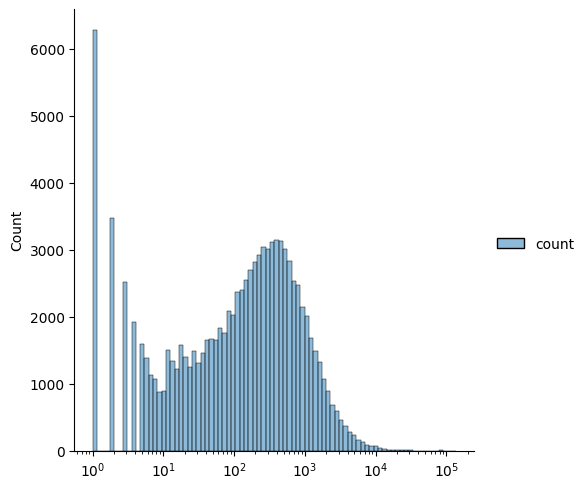

In [123]:
sns.displot(
    data=df,
    log_scale=True)
    

Plot a violin plot of read counts per sample.

/package/python-cbrg/current/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


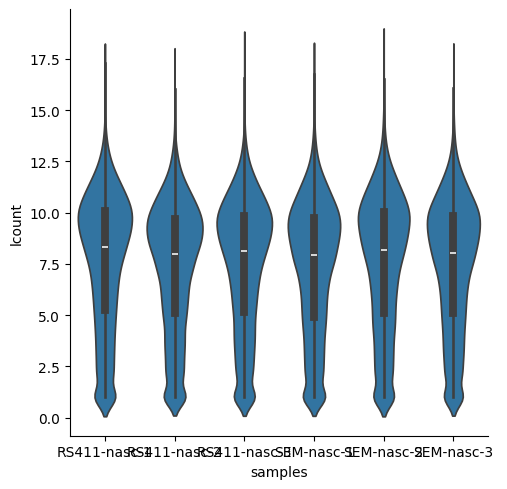

In [132]:
df['lcount']=np.log2(df['count'])+1
sns.catplot(
    data=df,
    x="samples",
    y="lcount",
    kind="violin",
)

Plot the count distribution of the 10 genes with highest expression (overall) in each sample.
BONUS: rotate the x axis labels (i.e., gene names) 90 degrees.

/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


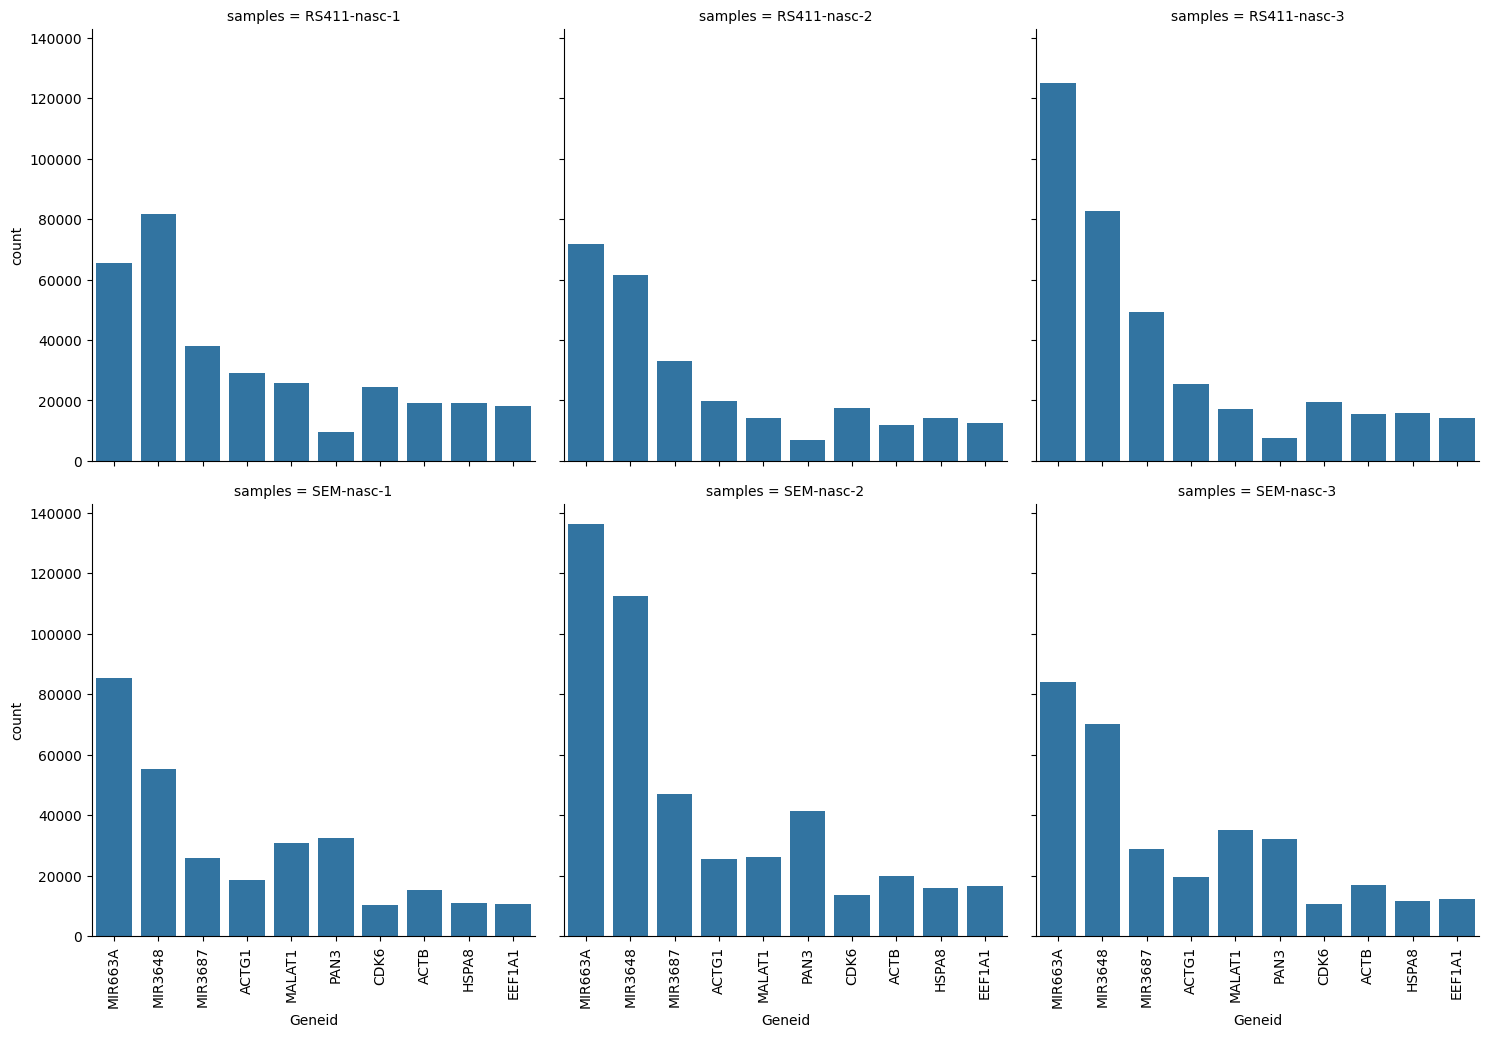

In [105]:
featurecounts["sumcounts"]=featurecounts.iloc[:, 1:6].sum(axis=1)
featurecounts = featurecounts.sort_values(by=["sumcounts"], ascending=False)
top10=featurecounts.head(10)
top10

top10=top10.drop(columns=['sumcounts'])


top10_melt = top10.melt(
    id_vars=["Geneid"],
    var_name="samples",
    value_name="count")
df


g= sns.catplot(data=top10_melt,
            x="Geneid",
            y="count",
            kind="bar",
            col="samples",
            col_wrap=3,
            )

g.tick_params(axis='x', rotation=90)

#for ax in g.axes.flat:
#    ax.set_xticks(range(len(top10["Geneid"]))) 
#    ax.set_xticklabels(top10["Geneid"], rotation=90)  

# Exercise 2

Load DeSeq2 results file (`deseq_output.tsv`)

In [148]:
deseq = pd.read_table("/project/shared/python/2_python_data_science/data/deseq_output.tsv", index_col=0)
deseq

,baseMean,log2FoldChange,lfcSE,pvalue,padj
WASH7P,108.158509,0.096715,0.179718,5.834321e-01,6.707839e-01
LOC100133331,65.145814,-0.362565,0.431068,3.336229e-01,4.277856e-01
LOC100288069,45.876601,-0.277239,0.244099,2.366208e-01,3.231358e-01
LINC00115,75.323309,-0.007138,0.204070,9.701801e-01,9.781925e-01
LOC643837,237.056072,0.036745,0.128368,7.732421e-01,8.301778e-01
...,...,...,...,...,...
MTCP1,86.680106,0.002960,0.181997,9.877517e-01,9.907088e-01
BRCC3,238.146325,-0.212312,0.122864,8.069483e-02,1.311621e-01
VBP1,253.376070,-0.066955,0.128907,5.988750e-01,6.837370e-01
TMLHE,75.107741,0.427131,0.195525,2.503444e-02,4.713713e-02


Plot a volcano plot of the results:
- X-axis: log2 fold change
- Y-axis: -log10 p-value
- Color points by adjusted p-value (FDR) > 0.05 (grey) or < 0.05 (red)
- Add a horizontal line at y = -log10(0.05) (dashed line)
- Add a vertical line at x = 0 (dashed line)
- BONUS: Adjust the legend (e.g., set the title to "padj < 0.05")


/package/python-cbrg/current/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/package/python-cbrg/current/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


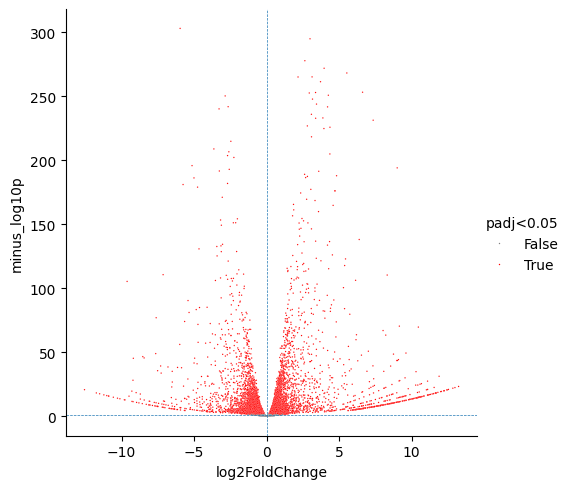

In [150]:
deseq['minus_log10p']= -np.log10(deseq['pvalue'])
deseq['sig'] = deseq['padj']<0.05
#print(deseq.head(10))

vol = sns.relplot(
    data=deseq, 
    x="log2FoldChange",
    y="minus_log10p",
    hue="sig", 
    palette={True: 'red', False: 'grey'},
    s=1 
)

plt.axhline(-np.log10(0.05),ls='--',lw=0.5)
plt.axvline(0,ls='--',lw=0.5)
vol.legend.set_title(title="padj<0.05")